# <center>Comparação entre modelos de Aprendizado de Máquina aplicados ao reconhecimento de atividades humanas e mudanças de postura com dados de sensores de celular</center>

**<center>Venicius G. R. Junior</center>**

<center>Instituto de Computação – Universidade Federal Fluminense (UFF)
Av. Gal. Milton Tavares de Souza, s/nº, São Domingos – Niterói – RJ – Brazil – 24210-346</center>


# Resumo

<p style="text-align: justify;">Esse trabalho analisa e compara o desempenho de algoritmos de Aprendizado de Máquina aplicados a uma base de dados de sensores acelerômetro e giroscópio, a fim de reconhecer atividades e transições entre atividades humanas. Os seguintes algoritmos foram empregados: Voting Classifier, Logistic Regression, Extra Trees Classifier, Suport Vector Classifier, Random Forest Classifier, Naive Bayes com Distribuição de Bernoulli, Naive Bayes com Distribuição Gaussiana, Decision Tree Classifier, Ada Boost Classifier combinado com Suport Vector Classifier e Ada Boost Classifier. Como medida de desempenho, esse estudo utilizou a acurácia, tempo de execução, erro médio absoluto nas etapas de treinamento e teste em múltiplas sub bases de dados, geradas a partir da base principal, em um processo de cross-validation com KFolds, para identificar possíveis sub e super ajustes. </p>

# 1. Introdução

<p style="text-align: justify;">Os modelos apresentados nesse trabalho foram desenvolvidos utilizando uma base de dados disponibilizada pela Universidade da California, Irvine (UCI). Essa base de dados foi construída por meio de um experimento com um grupo de 30 voluntários com idades entre 19 e 48 anos. Nesse experimento, os voluntários desempenharam um conjunto de atividades compostas por seis atividades básicas, três em repouso: em pé, sentado e deitado; e, três em movimento: caminhando, caminhando descendo escadas e caminhando subindo escadas.</p>
<p style="text-align: justify;">O experimento também considerou transições entre as atividades estáticas: passando da posição em pé para sentado, da posição sentado para em pé, da posição sentado para deitado, da posição deitado para sentado, da posição em pé para deitado e da posição deitado para em pé. Todos os participantes estavam usando um celular no quadril durante a execução do experimento. Foram capturados dados de aceleração linear de sensores acelerômetro em três dimensões e velocidades angulares de sensores giroscópio, também capturadas em três eixos, a uma taxa constante de 50Hz. </p>
<p style="text-align: justify;">Todo o experimento foi gravado em vídeo para tornar a tarefa de rotular os dados possível de ser realizada manualmente. Para o experimento, e aplicação dos modelos preditivos, a base de dados foi particionada em dois subconjuntos, sendo 70% dos dados utilizados para treinamento e 30% dos dados utilizados para teste.</p>
<p style="text-align: justify;">Os sinais dos sensores (acelerômetro e giroscópio) foram pré-processados pela aplicação de filtros antirruído. O sinal do sensor de aceleração, responsável por aceleração gravitacional e componentes dos movimentos corporais, foi separado usando um filtro passa baixas. Para cada instância de dado, foram calculados 561 atributos com base em propriedades físicas e estatísticas dos movimentos, mais informações sobre esses atributos podem ser encontradas no arquivo features_info.txt, disponível em [UCI 2015]. Essa versão da base disponibiliza os dados originais dos sinais inerciais capturados dos sensores dos celulares, além dos dados pré-processados. Esse fato viabiliza testes com os dados originais. Além disso, novos rótulos foram introduzidos, adicionando as transições entre diferentes posturas, dados que não estavam disponíveis em uma primeira versão da base, também disponível em [UCI 2015].</p>

# 2. Referencial Teórico e Revisão da Literatura

<p style="text-align: justify;">No cenário acadêmico atual, o reconhecimento da atividade humana se tornou um campo de pesquisa importante devido às suas contribuições com o objetivo de melhorar a qualidade de vida das pessoas. Novas áreas começaram a surgir e a ganhar destaque: Computação Ubíqua, Inteligência Ambiental, Computação Pervasiva e Tecnologias Assistivas segundo 	[Chen et al. 2012], [Cook e Das 2012] e [Campbell e Choudhury 2012].  Essas áreas usam sistemas de reconhecimento de atividades como um instrumento que fornece informações sobre o comportamento e as ações das pessoas segundo [Clarkson 2002].</p>
<p style="text-align: justify;">Atualmente, existem muitos aplicativos em que os sistemas de reconhecimento de atividade humana são utilizados, por exemplo, no monitoramento contínuo de pacientes com problemas motores para diagnóstico de saúde e adaptação de medicamentos. Esse tipo de abordagem combina a captura de sinais de sensores de ambientes e sensores usados pelos usuários com o processamento por meio de algoritmos de aprendizado de máquina para classificação como mostrado por [Avci et al. 2010].</p>
<p style="text-align: justify;">Vários sistemas de reconhecimento de atividade humana estão sendo propostos e pesquisados, incluindo áreas de locomoção, de atividades da vida diária, transporte, esportes e segurança, como abordado por [Nham et al. 2008] e [Tapia et al. 2004]. Esses sistemas são categorizados em relação à sua duração e complexidade, e as suas atividades são categorizadas em três grupos principais: eventos curtos, atividades básicas e atividades complexas. O primeiro grupo é composto por atividades de curta duração (da ordem de segundos), como transições posturais (por exemplo, sentar-se) e gestos corporais segundo [Mannini e Sabatini 2010]. Atividades básicas são caracterizadas por uma duração mais longa e podem ser dinâmicas ou estáticas (por exemplo, corrida, leitura) segundo [Bao e Intille 2004]. O último grupo, atividades complexas, é composto por progressões de atividades mais simples acima mencionadas e envolvem aspectos como interação com objetos e outras pessoas (por exemplo, praticar esportes, atividades sociais) segundo [Aggarwal e Ryoo 2011]. O presente trabalho aplica algoritmos abordando as duas primeiras categorias: eventos curtos e atividades básicas. </p> 
<p style="text-align: justify;">Sensores de ambientes e sensores que os usuários vestem têm sido ativamente explorados por trabalhos relacionados ao reconhecimento de atividades humanas. Câmeras de vídeo, microfones, sensores GPSs e sensores para medir a proximidade, movimento corporal e sinais vitais são apenas alguns exemplos. A pesquisa atual sobre sensores de ambiente tem se concentrado principalmente em câmeras de vídeo devido à facilidade de recuperação de informações visuais do ambiente. Câmeras também foram combinadas com sensores acelerômetros e microfones e introduzidas recentemente em tecnologias vestíveis para novas aplicações onipresentes segundo [Behera et al. 2015].</p>
<p style="text-align: justify;">Após as capturas de movimentos, realizada por uma, ou pela combinação de mais de uma das formas mencionadas nesse estudo, os dados coletados são analisados. Esses dados podem passar por processos de pré-processamento, por processos de exploração e adequação, para que finalmente sejam desenvolvidos modelos que possibilitem a identificação de determinadas atividades, tomando como base dados rotulados previamente. O estudo atual, utilizou as primeiras etapas de aquisição de dados, de observação do experimento e de rotulação dos dados adquiridos de um estudo realizado por pesquisadores da Universidade da California, Irvine (UCI) [UCI 2015]. Com as etapas de realização de experimento e aquisição de dados consideradas realizadas, esse estudo focou na análise dos dados e na aplicação de modelos e algoritmos da área de Aprendizado de Máquina.</p>
<p style="text-align: justify;">Os algoritmos Random Forest (RF) [Breiman 2001] e Extremely Randomized Trees (ERT) [Geurts et al. 2006] são algoritmos de classificação muito eficientes com base em árvores de decisão e fornecem estimativas da importância dos atributos, sendo indicados para a classificação de recursos. Esses algoritmos foram testados e aplicados sobre os dados adquiridos. Ao final do processo, os resultados produzidos foram comparados. O Random Forest gera várias árvores de decisão, amostrando aleatoriamente instâncias de treinamento do conjunto de dados e selecionando aleatoriamente m recursos de cada amostra, onde M é o número total de recursos por instância e m \< M. A ramificação das árvores é realizada encontrando-se a melhor divisão entre os recursos m em cada nó. No processo de classificação, cada árvore vota na classe e a classe majoritária é escolhida. Por outro lado, a ERT escolhe os pontos de divisão de recursos aleatoriamente. Isso aumenta a velocidade do treinamento porque o número de cálculos por nó diminui. A velocidade do ERT em relação ao RF pode ser comprovada nesse experimento. Ambos algoritmos fornecem excelente desempenho de classificação e podem treinar modelos em conjuntos de dados muito grandes. O valor do parâmetro m usado no RF e ERT foi o padrão por sua implementação na biblioteca scikit-learn [Pedregosa et al. 2011]. Não foi observado qualquer ganho significativo ajustando este parâmetro.</p>
<p style="text-align: justify;">O algoritmo de Regressão Logística (LR) [Hosmer et al. 2013] também foi utilizado nesse estudo, pois é simples e rápido. Além disso, o LR fornece fácil interpretação dos modelos, fornece uma estimativa da importância dos atributos e, de forma simples, é possível utilizar recursos de computação paralela, o que aumenta sua velocidade de execução.</p>
<p style="text-align: justify;">O algoritmo Support Vector Machine (SVM) Classifier [Cortes e Vapnik 1995] também foi usado. Esse modelo é composto por um conjunto de métodos de aprendizado supervisionado usados para classificação, regressão e detecção de outliers segundo [Cortes e Vapnik 1995]. É um classificador muito poderoso, mas para conjuntos de dados maiores, é necessário muito tempo para a construção de modelos, fator que em determinados casos é decisivo. Foi usado nesse estudo, pois, ainda segundo [Cortes e Vapnik 1995], esse algoritmo é muito eficiente em espaços com número de dimensões elevado. O ajuste de parâmetros de SVMs é recomendado, pois aumenta significativamente a precisão da classificação e reduz o overfitting segundo [Lameski et al. 2015].</p>
<p style="text-align: justify;">O algoritmo Naive Bayes (NB) [Rish 2001] também foi usado nesse estudo. Foram utilizadas funções de distribuição Gaussiana e de Bernoulli para os modelos testados. Os algoritmos do tipo Naive Bayes são um conjunto de algoritmos de aprendizado supervisionado com base na aplicação do teorema de Bayes com a suposição "ingênua" de independência condicional entre cada par de instância de dado, dado o valor da variável da classe. Apesar de suas suposições aparentemente simplificadas, os classificadores Naive Bayes têm obtido bom desempenho em muitas situações do mundo real, como classificação de documentos e filtragem de spam. Eles exigem uma pequena quantidade de dados de treinamento para estimar os parâmetros necessários segundo [Pedregosa et al. 2011].</p>
<p style="text-align: justify;">Esse estudo também utilizou o classificador Adaptive Boosting (AdaBoost) [Freund e Schapire 1995]. Esse algoritmo é um meta-estimador que começa ajustando um classificador no conjunto de dados original e depois ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas ajustando os pesos das instâncias classificadas incorretamente, para que os classificadores subsequentes se concentrem mais em casos difíceis, ainda segundo [Freund e Schapire 1995]. Nos últimos anos, os algoritmos de reforço (boosting) se tornaram mais populares nas competições de ciência de dados ou aprendizado de máquina. A maior parte dos vencedores dessas competições usam algoritmos de reforço para obter melhor desempenho para seu modelo. Os algoritmos de reforço combinam vários modelos com um rendimento não muito elevado para criar modelos de alta precisão. Algoritmos como AdaBoost, Gradient Boosting e XGBoost, são algoritmos de Aprendizado de Máquina amplamente utilizados para vencer as competições de ciência de dados segundo [Nielsen 2016].</p>
<p style="text-align: justify;">Além desses algoritmos mencionados, esse estudo também utilizou um algoritmo de árvore de decisão (Decision Tree - DT) [Breiman et al. 1984]. Esse algoritmo é considerado um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo para prever o valor de uma variável de destino, aprendendo regras simples de decisão inferidas a partir dos atributos dos dados. Esse algoritmo foi escolhido para esse estudo, pois árvores de decisão são simples de se interpretar e de se entender, não precisam de muita preparação nos dados, o custo computacional é da ordem de logaritmo de n, é capaz de utilizar dados numéricos e categóricos, além disso, árvores podem ser visualizadas segundo [Pedregosa et al. 2011].</p>
</p>

# 3. Metodologia da Análise Experimental

<p style="text-align: justify;">Primeiramente, foi escolhida a linguagem de programação Python em sua versão 3 para a manipulação dos dados e execução dos modelos preditivos. Para facilitar a edição do código fonte e a visualização de seus resultados após execução, optou-se por utilizar a ferramenta Ipython Notebook, disponível no pacote de programas para Windows chamado Anaconda. Todas as análises foram feitas utilizando um computador com o sistema operacional Windows, processador Intel core i5 de 5ª geração com velocidade de 2,40 GHz, 2 núcleos físicos, 4 núcleos virtuais, 16 GB de memória RAM DDR3.</p>
<p style="text-align: justify;">Foi realizada uma análise exploratória da base de dados utilizada nesse experimento, para encontrar possíveis pontos de falha, dados faltando, para observar o formato de cada atributo e para adequar a base de dados a cada algoritmo que irá utilizá-la. Os dados da base utilizada nesse experimento foram disponibilizados pela Universidade da California, Irvine (UCI), e faziam parte de um estudo para identificar diferentes tipos de postura e diferentes tipos de transição entre posturas, ou posições, em que os participantes da pesquisa se encontravam.</p>
<p style="text-align: justify;">Após essa etapa de exploração e adequação dos dados, diversos modelos da área de Aprendizado de Máquina foram aplicados. Todos os modelos aplicados podem ser vistos na tabela 1. Durante a aplicação de cada modelo, seus parâmetros foram testados e ajustados, com a finalidade de encontrar o conjunto de parâmetros mais adequado para que o modelo obtivesse boa performance com a sua proposta de classificação. Todos os códigos podem ser encontrados em https://github.com/veniciusgrjr/hapt-ml.</p>
<p style="text-align: justify;">Em outro momento, com os resultados encontrados pelos algoritmos, realizou-se uma comparação entre os valores de resultados obtidos, para encontrar o modelo que mais se adequa aos dados e às previsões desejadas.
</p>

# 4. Resultados Obtidos

<p style="text-align: justify;">O algoritmo Decision Tree Classifier apresentou desempenho razoável. A simplicidade do algoritmo está de acordo com a performance do modelo preditivo gerado, com 80,20% de acerto na classificação, ocupando a 10ª posição em comparação com os algoritmos utilizados nesse trabalho, como é possível observar na tabela 1. Quanto ao tempo de execução, 5,71 segundos, foi um algoritmo que não se destacou, porém para aplicações em tempo real esse valor seria considerado ruim. Analisando os erros no treinamento e no teste, 0,000 e 0,313, respectivamente, observa-se um erro baixo nos dados de treinamento, indicando ajuste elevado, talvez excessivo, e um pouco de overfitting se compararmos o erro no teste com o no treinamento. Esse valor não é considerado um overfitting elevado.</p>
<p style="text-align: justify;">O classificador Naive Bayes apresentou desempenho razoável em comparação com os outros algoritmos utilizados nesse trabalho, ocupando 9ª posição utilizando a distribuição de Bernoulli e ocupando a 11ª posição utilizando a distribuição Gaussiana, de acordo com os resultados mostrados na tabela 1. Um dos fatores mais importante desse algoritmo é a sua velocidade de execução, como pode ser observado na tabela 1, ocupando as primeiras posições quando analisado em relação à velocidade de execução. Analisando os erros no treinamento e no teste, utilizando a distribuição de Bernoulli e a distribuição Gaussiana, 0,237 e 0,366, 0,393 e 0,45, respectivamente, observa-se um pouco de underfitting e um pouco de overfitting se compararmos o erro no teste com o no treinamento. Nessa modelo, o que mais se destaca é o underfitting, expressando resultados pouco confiáveis.</p>
<p style="text-align: justify;">O algoritmo Random Forest Classifier obteve também um desempenho razoável com 90,48% de porcentagem de acerto na classificação, utilizando seus processos de votação e aprendizado com “florestas aleatórias”. Quanto a velocidade de execução seu desempenho também não se destacou entre os mais rápidos, levando 6,52 segundos para realizar sua classificação. A característica de lentidão de alguns algoritmos dificulta sua aplicação em modelos preditivos em tempo real. Um ponto positivo para o uso desse algoritmo nesse trabalho foi sua versatilidade, pois pode receber entradas binárias, categóricas ou numéricas segundo [Pedregosa et al. 2011]. Analisando os erros no treinamento e no teste, 0,000 e 0,080, respectivamente, observa-se um erro baixo nos dados de treinamento, indicando ajuste elevado, talvez excessivo, e um pouco de overfitting se compararmos o erro no teste com o no treinamento. Essa diferença entre os erros não é considerada um overfitting elevado. Para esse algoritmo, foram feitos testes com cross-validation utilizando KFold, dividindo os dados em 20 folds, e o modelo realmente não apresenta overfitting elevado.</p>
<p style="text-align: justify;">O algoritmo Extremely Randomized Trees, mesmo tendo semelhanças com o algoritmo Random Forest, apresentou desempenho um pouco mais elevado, atingindo a taxa de previsão correta de 92,28%, ocupando a 6ª posição na classificação por performance. Assim como o Random Forest, esse algoritmo utiliza certas decisões de forma aleatória, porém apresentou velocidade de execução (2,87 s) maior do que a velocidade de execução do Random Forest. Analisando os erros no treinamento e no teste, 0,000 e 0,124, respectivamente, observa-se um erro baixo nos dados de treinamento, indicando ajuste elevado, talvez excessivo, e um pouco de overfitting se compararmos o erro no teste com o no treinamento. Essa diferença entre os erros não é considerada um overfitting elevado. Para esse algoritmo, foram feitos testes com cross-validation utilizando KFold, dividindo os dados em 20 folds, e o modelo realmente não apresenta overfitting elevado.</p>
<p style="text-align: justify;">Embora esse seja um problema de classificação e não de regressão, optou-se por utilizar o algoritmo Logistic Regression, com certas transformações nos dados para que isso fosse possível. Esse algoritmo obteve um desempenho acima da média, atingindo a taxa de acerto de 94,52%. Em relação ao tempo de execução, seu desempenho não atingiu níveis de destaque de acordo com os algoritmos utilizados nesse trabalho. Analisando os erros no treinamento e no teste, 0,014 e 0,096, respectivamente, observa-se um erro baixo nos dados de treinamento, e um pouco de overfitting se compararmos o erro no teste com o erro no treinamento. Essa diferença entre os erros não é considerada um overfitting elevado.</p>
<p style="text-align: justify;">O algoritmo Support Vector Machine obteve desempenho razoável, atingindo a taxa de acerto de 91,80%, ficando classificado na 7ª posição em relação aos outros algoritmos. Quanto à velocidade de execução, seu desempenho não se destacou, atingindo a 16,61 segundos. Esse algoritmo ofereceria grandes latências se fosse usado em sistemas em tempo real. Analisando os erros no treinamento e no teste, 0,090 e 0,141, respectivamente, observa-se um erro baixo nos dados de treinamento, e um pouco de overfitting se compararmos o erro no teste com o no treinamento. Essa diferença entre os erros não é considerada um overfitting significativo.</p>
<p style="text-align: justify;">O algoritmo AdaBoostClassifier não obteve desempenho significativo quando comparado ao desempenho de outros algoritmos abordados nesse trabalho. Seu desempenho foi de 51,96%, utilizando o estimador base padrão, ocupando a 13ª posição. O desempenho desse algoritmo aumentou quando o Suport Vector Classifier foi utilizado como estimador base, obtendo um desempenho de 69,48% e ocupando a 12ª posição, porém o seu tempo de execução cresceu muito com essa combinação, chegando a 25587,35 segundos. Analisando os erros no treinamento e no teste, 1,630 e 1,774, respectivamente, observa-se um caso de underfitting.</p>
<p style="text-align: justify;">Os algoritmos que obtiveram melhor desempenho nesse trabalho foram os do tipo Voting Classifier, que são gerados pela combinação de outros algoritmos, com seus respectivos pesos. Essa alternativa de combinar múltiplos algoritmos em um processo de votação em busca de aumento na acurácia é utilizada com frequência em competições de análise de dados. Esse aumento de performance por meio da combinação de algoritmos pôde ser observado nesse trabalho também, de acordo com a tabela 1. A combinação que obteve melhor resultado foi a composta pelos algoritmos Logistic Regression com peso 5, Support Vector Classifier com peso 1 e Extra Trees Classifier com peso 3, atingindo o desempenho de 95,00% de acerto. Essa combinação de modelos ganha na acurácia, porém perde no tempo elevado de execução, não sendo indicada para aplicações em tempo real. Analisando os erros no treinamento e no teste, 0,004 e 0,060, respectivamente, observa-se um erro baixo nos dados de treinamento, indicando ajuste elevado, talvez excessivo. Essa diferença entre os erros não é considerada um overfitting significativo. Para esse algoritmo, foram feitos testes com cross-validation utilizando KFold, dividindo os dados em 20 folds, em um dos folds foram encontrados 0,004 e 0,186, para os erros de treinamento e teste, respectivamente, mostrando um overfitting pequeno para essa iteração.
</p>

**<center>Tabela 1. Performance dos algoritmos analisados</center>**

|     **Classificação**    |     **Algoritmo**                                                                                                                        |     **Performance (%)**   |     **Tempo de execussão (Segundos)**    |     **Erro no treinamento**    |     **Erro no teste** |
|--------------------------|------------------------------------------------------------------------------------------------------------------------------------------|---------------------------|------------------------------------------|--------------------------------|-----------------------|
|     1º                   |     VotingClassifier com: LogisticRegression(peso   5), SVC(peso 1),  ExtraTreesClassifier(peso   3)                                     |     95,00                 |     153,84                               |     0,004                      |     0,060             |
|     2º                   |     VotingClassifier com: LogisticRegression(peso   3), SVC(peso 1), ExtraTreesClassifier(peso 2)                                        |     94,90                 |     149,94                               |     0,003                      |     0,062             |
|     3º                   |     VotingClassifier com: LogisticRegression(peso   1), SVC(peso 1), ExtraTreesClassifier(peso 1)                                        |     94,84                 |     153,96                               |     0,004                      |     0,058             |
|     4º                   |     Logistic Regression                                                                                                                  |     94,52                 |     11,56                                |     0,014                      |     0.096             |
|     5º                   |     VotingClassifier com: DecisionTreeClassifier,   LogisticRegression, GaussianNB, RandomForestClassifier, SVC, ExtraTreesClassifier    |     92,97                 |     171,20                               |     0,010                      |     0,065             |
|     6º                   |     Extremely Randomized   Trees                                                                                                         |     92,28                 |     2,98                                 |     0,000                      |     0,124             |
|     7º                   |     Support   Vector Machine                                                                                                             |     91,80                 |     16,64                                |     0,090                      |     0,141             |
|     8º                   |     RandomForestClassifier                                                                                                               |     90,48                 |     6,52                                 |     0,000                      |     0,080             |
|     9º                   |     Naive Bayes   Distribuição de Bernoulli                                                                                              |     82,41                 |     0,16                                 |     0,237                      |     0,366             |
|     10º                  |     Decision Tree Classifier                                                                                                             |     80,20                 |     5,71                                 |     0,000                      |     0,313             |
|     11º                  |     Naive Bayes   Distribuição Gaussiana                                                                                                 |     74,73                 |     0,54                                 |     0,393                      |     0,456             |
|     12º                  |     AdaBoostClassifier +   Suport Vector Classifier                                                                                      |     69,48                 |     25587,35                             |     ---                        |     ---               |
|     13º                  |     AdaBoostClassifier                                                                                                                   |     51,96                 |     29,36                                |     1,630                      |     1,774             |

# 5. Conclusões e Trabalhos Futuros

<p style="text-align: justify;">Esse trabalho analisou o desempenho de diversos algoritmos de Aprendizado de Máquina aplicados a uma base de dados de sensores acelerômetro e giroscópio, dados mencionados nesse estudo. O algoritmo que obteve melhor desempenho foi o Voting Classifier, que foi gerado pela combinação dos seguintes algoritmos: Logistic Regressiom com peso 5, Support Vector Classifier com peso 1 e Extra Trees Classifier com peso 3, atingindo o desempenho de 95,00% de acerto, com baixa taxa de overfitting, porém com tempo de execução um pouco elevado, 153,84 segundos. Para aplicações em tempo real, o algoritmo mais indicado seria o Naive Bayes com Distribuição de Bernoulli, com tempo de execução de 0,16 segundos e acurácia de 82,41 segundos.</p>
<p style="text-align: justify;">Como sugestão de trabalhos futuros, seria interessante repetir o experimento com um grupo de pessoas diferentes, nas mesmas condições do inicial, para que uma outra base fosse disponibilizada para testes, para novos ajustes de hiper parâmetros dos modelos usados e para identificação de sub e super ajuste nos modelos testados.</p>


# Referências

<p style="text-align: justify;">Jorge L. Reyes-Ortiz, Luca Oneto, Xavier Parra, and Davide Anguita. 2016. Transition-aware human activity recognition using smartphones. Neurocomputing 171(C), 754--767.</p>

<p style="text-align: justify;">L. Chen, J. Hoey, C. Nugent, D. Cook, Z. Yu, Sensor-based activity recognition, IEEE Transactions. on Systems, Man, and Cybernetics, Part C: Applications and Reviews 42 (2012) 790–808.</p>

<p style="text-align: justify;">D. J. Cook, S. K. Das, Pervasive computing at scale: Transforming the state of the art, Pervasive. Mobile Computing 8 (2012) 22–35.</p>

<p style="text-align: justify;">A. Campbell, T. Choudhury, From smart to cognitive phones, IEEE Pervasive Computing (2012). </p>

<p style="text-align: justify;">B. P. Clarkson, Life patterns: structure from wearable sensors, Ph.D. thesis, Massachusetts Institute of Technology (2002).</p>

<p style="text-align: justify;">A. Avci, S. Bosch, M. Marin-Perianu, R. Marin-Perianu, P. Havinga, Activity recognition using inertial sensing for healthcare, wellbeing and sports applications: A survey, in: International Conference on Architecture of Computing Systems, 2010.</p>

<p style="text-align: justify;">B. Nham, K. Siangliulue, S. Yeung, Predicting mode of transport from iphone accelerometer data, Tech. rep., Tech. report, Stanford Univ (2008).</p>

<p style="text-align: justify;">E. Tapia, S. Intille, K. Larson, Activity recognition in the home using simple and ubiquitous sensors, in: Pervasive Computing, 2004.</p>

<p style="text-align: justify;">A. Mannini, A. M. Sabatini, Machine learning methods for classifying human physical activity from on-body accelerometers, Sensors 10 (2010) 1154–1175.</p>

<p style="text-align: justify;">L. Bao, S. Intille, Activity recognition from user-annotated acceleration data, in: Pervasive Computing, 2004.</p>

<p style="text-align: justify;">J. Aggarwal, M. S. Ryoo, Human activity analysis: A review, ACM Computing Surveys 43 (2011) 16.</p>

<p style="text-align: justify;">UCI, https://archive.ics.uci.edu/ml/datasets/SmartphoneBased+Recognition+of+Human+Activities+and+Postural+Transitions (2015), acessado em 06/06/2020.</p>

<p style="text-align: justify;">A. Behera, D. Hogg, A. Cohn, Egocentric activity monitoring and recovery, in: Asian Conference on Computer Vision, 2013.</p>

<p style="text-align: justify;">L. Breiman, ‘‘Random forests,’’ Mach. Learn., vol. 45, no. 1, pp. 5–32, 2001.</p>

<p style="text-align: justify;">P. Geurts, D. Ernst, and L. Wehenkel, ‘‘Extremely randomized trees,’’ Mach. Learn., vol. 63, no. 1, pp. 3–42, 2006.</p>

<p style="text-align: justify;">F. Pedregosa et al., ‘‘Scikit-learn: Machine learning in Python,’’ J. Mach. Learn. Res., vol. 12, pp. 2825–2830, Oct. 2011.</p>

<p style="text-align: justify;">D. W. Hosmer, Jr., S. Lemeshow, and R. X. Sturdivant, Applied Logistic Regression, vol. 398. Hoboken, NJ, USA: Wiley, 2013.</p>

<p style="text-align: justify;">C. Cortes and V. Vapnik, ‘‘Support-vector networks,’’ Mach. Learn., vol. 20, no. 3, pp. 273–297, 1995.</p>

<p style="text-align: justify;">P. Lameski, E. Zdravevski, R. Mingov, and A. Kulakov, ‘‘SVM parameter tuning with grid search and its impact on reduction of model over-fitting,’’ in Rough Sets, Fuzzy Sets, Data Mining, Granular Computing. Cham, Switzerland: Springer, 2015, pp. 464–474.</p>

<p style="text-align: justify;">I. Rish, ‘‘An empirical study of the naive Bayes classifier,’’ in Proc. IJCAI Workshop Empirical Methods Artif. Intell., vol. 3. Menlo Park, CA, USA, 2001, no. 22, pp. 41–46.</p>

<p style="text-align: justify;">Y. Freund, R. Schapire, “A Decision-Theoretic Generalization of on-Line Learning and an Application to Boosting”, 1995.</p>

<p style="text-align: justify;">L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984.</p>

<p style="text-align: justify;">D. Nielsen, "Tree Boosting With XGBoost Why Does XGBoost Win 'Every' Machine Learning Competition?", 2016.</p>
</p>

# Código Fonte

# Labels

In [1]:
import pandas as pd
import numpy as np

path_labels = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/RawData/labels.txt'
column_names_labels = ['Exp_ID','User_ID','Activ_ID','Label_Start','Label_End']
labels = pd.read_csv(path_labels, sep=' ', header=None, names=column_names_labels )
labels[0:3]

,Exp_ID,User_ID,Activ_ID,Label_Start,Label_End
0,1,1,5,250,1232
1,1,1,7,1233,1392
2,1,1,4,1393,2194


# Activity_labels

In [2]:
path_alabels = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/activity_labels.txt'
column_names_alabels = ['index','Str_activity']
alabels = pd.read_csv(path_alabels, sep=' ', header=None, names=column_names_alabels )
##alabels.loc[1, 'Str_activity']
#alabels[0:3]
alabels

,index,Str_activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING
6,7,STAND_TO_SIT
7,8,SIT_TO_STAND
8,9,SIT_TO_LIE
9,10,LIE_TO_SIT


# Features

In [3]:
path_features = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/features.txt'
##features = ['Acc_x','Acc_y','Acc_z']
features = pd.read_csv(path_features, header=None )
features = features.loc[0:,0]
b = []
for a in features:
    b.append(a)
features = b
features[0:3]


['tBodyAcc-Mean-1                ',
 'tBodyAcc-Mean-2                ',
 'tBodyAcc-Mean-3                ']

# Train and test Data Set

In [30]:
from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

# Usando AdaBoostClassifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier
import time

ini = time.time()

abc = AdaBoostClassifier(n_estimators= 50, learning_rate=1)

# Treinando o modelo
model = abc.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_Previsto_ada = model.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_Previsto_ada)

p_ac   

0.5196078431372549

In [16]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 29.36166763305664


# Overfitting x Underfitting

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error

abc = AdaBoostClassifier(n_estimators= 50, learning_rate=1)

# Treinando o modelo
model = abc.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = model.predict(X_train)
Y_test_data_pred = model.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 1.6305499373976693
Testing Error: 1.7747252747252746


# Usando KFolds cross-validation para avaliar a capacidade de generalização do AdaBoostClassifier

In [7]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    # Classificadores
    abc = AdaBoostClassifier(n_estimators= 50, learning_rate=1)
   
    # treinamento

    abc = abc.fit(X_train, Y_train.transpose().to_numpy()[0])

    Y_train_data_pred = abc.predict(X_train)
    Y_test_data_pred = abc.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

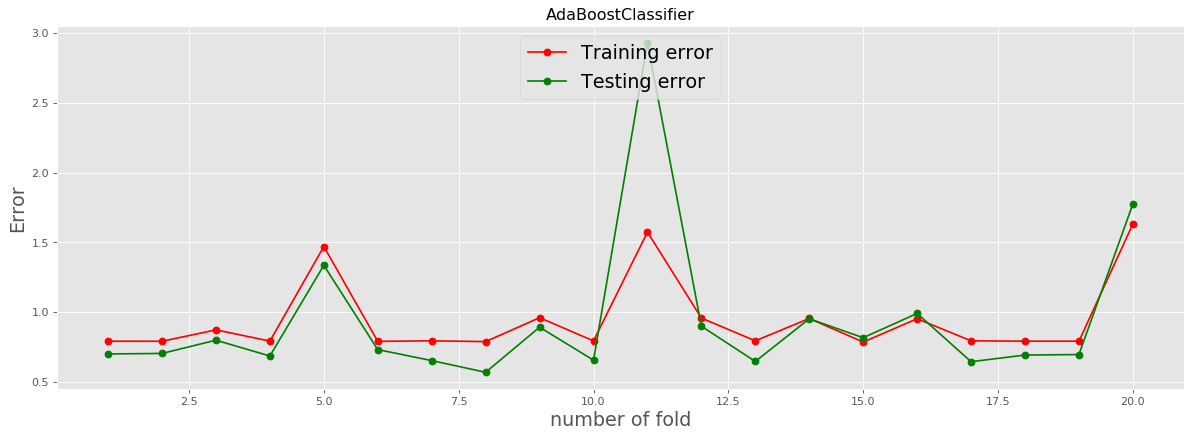

In [8]:
    
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('AdaBoostClassifier')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show()  

# Usando AdaBoostClassifier com base estimator diferente, por padrão ele usa DecisionTreeClassifier. AdaBoostClassifier com Support Vector Classifier


In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import time

ini = time.time()

svc=SVC(probability=True, kernel='linear')

abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
model = abc.fit(X_train, Y_train.transpose().to_numpy()[0])

Y_previsto_ADAB_SVC = model.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_ADAB_SVC)
p_ac

0.6948134092346616

In [6]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 25587.353974103928


# Usando VotingClassifier com: DecisionTreeClassifier, LogisticRegression, GaussianNB, RandomForestClassifier, SVC, ExtraTreesClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

import time

ini = time.time()

# Classificadores
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = LogisticRegression(random_state=0)
clf3 = GaussianNB()
clf4 = RandomForestClassifier(n_estimators=50, random_state=1)
clf5 = SVC(kernel='rbf', probability=True)
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

eclf = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('gnb', clf3), ('rfc', clf4), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[1, 1, 1, 1, 1, 1])

clf1 = clf1.fit(X_train, Y_train.transpose().to_numpy()[0])
clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
clf3 = clf3.fit(X_train, Y_train.transpose().to_numpy()[0])
clf4 = clf4.fit(X_train, Y_train.transpose().to_numpy()[0])
clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

Y_previsto_vc = eclf.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_vc)
p_ac




0.9297912713472486

In [39]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 171.20789122581482


# Overfitting x Underfitting

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

# Classificadores
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = LogisticRegression(random_state=0)
clf3 = GaussianNB()
clf4 = RandomForestClassifier(n_estimators=50, random_state=1)
clf5 = SVC(kernel='rbf', probability=True)
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

eclf = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('gnb', clf3), ('rfc', clf4), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[1, 1, 1, 1, 1, 1])

clf1 = clf1.fit(X_train, Y_train.transpose().to_numpy()[0])
clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
clf3 = clf3.fit(X_train, Y_train.transpose().to_numpy()[0])
clf4 = clf4.fit(X_train, Y_train.transpose().to_numpy()[0])
clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])


# Aplicando o modelo treinado
Y_train_data_pred = eclf.predict(X_train)
Y_test_data_pred = eclf.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.010594240585572571
Testing Error: 0.06593406593406594


# Usando KFolds cross-validation para avaliar a capacidade de generalização do VotingClassifier com: DecisionTreeClassifier, LogisticRegression, GaussianNB, RandomForestClassifier, SVC, ExtraTreesClassifier

In [ ]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    # Classificadores
    clf1 = DecisionTreeClassifier(max_depth=4)
    clf2 = LogisticRegression(random_state=0)
    clf3 = GaussianNB()
    clf4 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf5 = SVC(kernel='rbf', probability=True)
    clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

    eclf = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('gnb', clf3), ('rfc', clf4), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[1, 1, 1, 1, 1, 1])

    clf1 = clf1.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf3 = clf3.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf4 = clf4.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

    eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

    Y_train_data_pred = eclf.predict(X_train)
    Y_test_data_pred = eclf.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

In [ ]:
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('DecisionTreeClassifier(1), LogisticRegression(1), GaussianNB(1), RandomForestClassifier(1), SVC(1), ExtraTreesClassifier(1)')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show()  

# Usando VotingClassifier com: LogisticRegression(peso 3), SVC(peso 1), ExtraTreesClassifier(peso 2)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

import time

ini = time.time()

# Classificadores
clf2 = LogisticRegression(random_state=0)
clf5 = SVC(kernel='rbf', probability=True)
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[3, 1, 2])

clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

Y_previsto_vc2 = eclf.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_vc2)
p_ac


0.9490828589500316

In [41]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 149.9441740512848


# Overfitting x Underfitting

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

# Classificadores
clf2 = LogisticRegression(random_state=0)
clf5 = SVC(kernel='rbf', probability=True)
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[3, 1, 2])

clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = eclf.predict(X_train)
Y_test_data_pred = eclf.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.003948762400077049
Testing Error: 0.06227106227106227


# Usando KFolds cross-validation para avaliar a capacidade de generalização do VotingClassifier com: LogisticRegression(peso 3), SVC(peso 1), ExtraTreesClassifier(peso 2)

In [ ]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    # Classificadores
    clf2 = LogisticRegression(random_state=0)
    clf5 = SVC(kernel='rbf', probability=True)
    clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

    eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[3, 1, 2])

    clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

    eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

    Y_train_data_pred = eclf.predict(X_train)
    Y_test_data_pred = eclf.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

In [ ]:
    
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('LogisticRegression(3), SVC(1), ExtraTreesClassifier(2)')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show()  

# Usando VotingClassifier com: LogisticRegression(peso 1), SVC(peso 1), ExtraTreesClassifier(peso 1)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

import time

ini = time.time()

# Classificadores
clf2 = LogisticRegression(random_state=0)
clf5 = SVC(kernel='rbf', probability=True)
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[1, 1, 1])

clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

Y_previsto_vc2 = eclf.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_vc2)
p_ac

0.948450347881088

In [43]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 153.9640815258026


# Overfitting x Underfitting

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

# Classificadores
clf2 = LogisticRegression(random_state=0)
clf5 = SVC(kernel='rbf', probability=True)
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[1, 1, 1])

clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = eclf.predict(X_train)
Y_test_data_pred = eclf.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.004911875180583647
Testing Error: 0.05860805860805861


# Usando KFolds cross-validation para avaliar a capacidade de generalização

In [ ]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    # Classificadores
    clf2 = LogisticRegression(random_state=0)
    clf5 = SVC(kernel='rbf', probability=True)
    clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

    eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[1, 1, 1])

    clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

    eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

    Y_train_data_pred = eclf.predict(X_train)
    Y_test_data_pred = eclf.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

In [ ]:
    
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('LogisticRegression(1), SVC(1), ExtraTreesClassifier(1)')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show()  

# Usando VotingClassifier com: LogisticRegression(peso 5), SVC(peso 1), ExtraTreesClassifier(peso 3)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

import time

ini = time.time()

# Classificadores
clf2 = LogisticRegression(random_state=0)
clf5 = SVC(kernel='rbf', probability=True)
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[5, 1, 3])

clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

Y_previsto_vc2 = eclf.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_vc2)
p_ac

0.9500316255534472

In [7]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 145.84465742111206


# Overfitting x Underfitting

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

# Classificadores
clf2 = LogisticRegression(random_state=0)
clf5 = SVC(kernel='rbf', probability=True)
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)

eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[5, 1, 3])

clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = eclf.predict(X_train)
Y_test_data_pred = eclf.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.004141384956178369
Testing Error: 0.06043956043956044


# Usando KFolds cross-validation para avaliar a capacidade de generalização com LogisticRegression(peso 5), SVC(peso 1), ExtraTreesClassifier(peso 3)

In [54]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    clf2 = LogisticRegression(random_state=0)
    clf5 = SVC(kernel='rbf', probability=True)
    clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    
    eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[5, 1, 3])

    clf2 = clf2.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf5 = clf5.fit(X_train, Y_train.transpose().to_numpy()[0])
    clf6 = clf6.fit(X_train, Y_train.transpose().to_numpy()[0])

    eclf = eclf.fit(X_train, Y_train.transpose().to_numpy()[0])
    
    
    Y_train_data_pred = eclf.predict(X_train)
    Y_test_data_pred = eclf.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

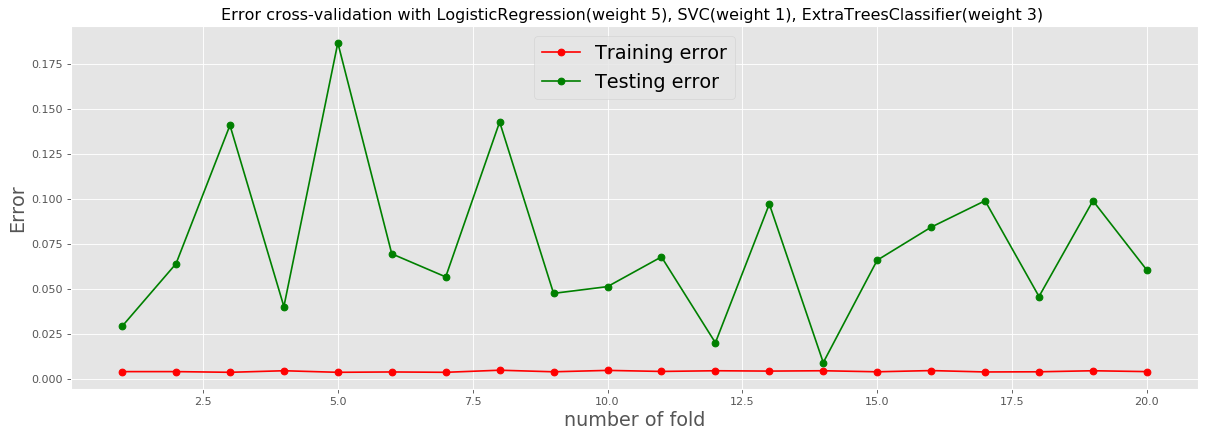

In [55]:
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('Error cross-validation with LogisticRegression(weight 5), SVC(weight 1), ExtraTreesClassifier(weight 3) ')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show() 

In [56]:
for a in range(0,20) :
    print("{0:.3f}  {1:.3f}".format( list_training_error[a], list_testing_error[a]))

0.004  0.029
0.004  0.064
0.004  0.141
0.005  0.040
0.004  0.186
0.004  0.069
0.004  0.057
0.005  0.143
0.004  0.048
0.005  0.051
0.004  0.068
0.005  0.020
0.004  0.097
0.005  0.009
0.004  0.066
0.005  0.084
0.004  0.099
0.004  0.046
0.005  0.099
0.004  0.060


# Usando Decision Tree Classifier

In [35]:
import time

ini = time.time()


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, Y_train.transpose().to_numpy()[0])
Y_previsto_DTC = dtc.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_DTC)
p_ac

0.8020240354206198

In [36]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 5.718120813369751


# Overfitting x Underfitting

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = dtc.predict(X_train)
Y_test_data_pred = dtc.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.0
Testing Error: 0.3131868131868132


# Usando KFolds cross-validation para avaliar a capacidade de generalização com Decision Tree Classifier

In [51]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    dtc = DecisionTreeClassifier(random_state=0)
    dtc = dtc.fit(X_train, Y_train.transpose().to_numpy()[0])
    
    Y_train_data_pred = dtc.predict(X_train)
    Y_test_data_pred = dtc.predict(X_test)
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

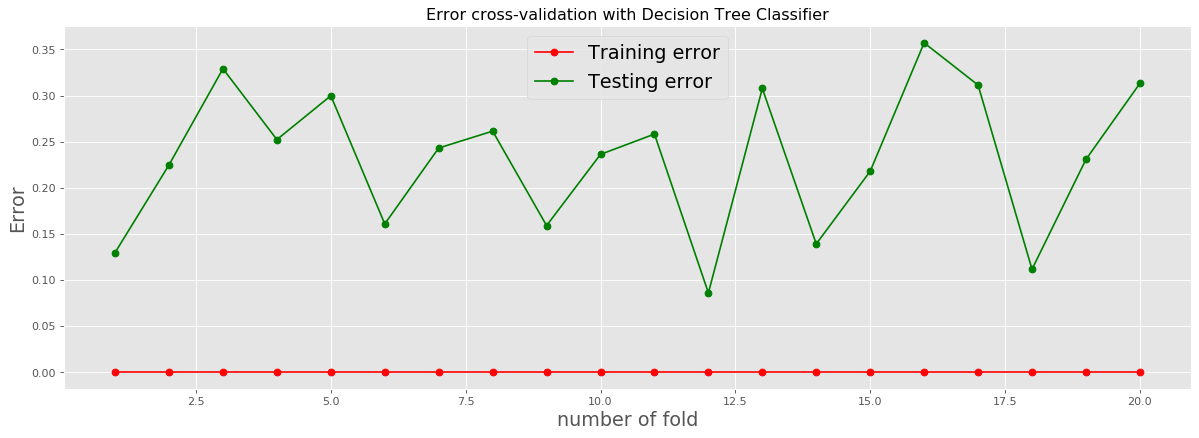

In [52]:
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('Error cross-validation with Decision Tree Classifier')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show() 

In [53]:
for a in range(0,20) :
    print("{0:.3f}  {1:.3f}".format( list_training_error[a], list_testing_error[a]))

0.000  0.130
0.000  0.225
0.000  0.329
0.000  0.252
0.000  0.300
0.000  0.161
0.000  0.243
0.000  0.261
0.000  0.159
0.000  0.236
0.000  0.258
0.000  0.086
0.000  0.308
0.000  0.139
0.000  0.218
0.000  0.357
0.000  0.311
0.000  0.112
0.000  0.231
0.000  0.313


# Usando Naive Bayes Distribuição Gaussiana

In [41]:
import time

ini = time.time()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train.transpose().to_numpy()[0] )
Y_previsto_NB_G = gnb.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_NB_G)
p_ac

0.7473118279569892

In [42]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 0.540687084197998


# Overfitting x Underfitting

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, Y_train.transpose().to_numpy()[0] )


# Aplicando o modelo treinado
Y_train_data_pred = gnb.predict(X_train)
Y_test_data_pred = gnb.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.393431570836945
Testing Error: 0.45604395604395603


# Usando KFolds cross-validation para avaliar a capacidade de generalização com Naive Bayes Distribuição Gaussiana

In [47]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    gnb = GaussianNB()
    gnb = gnb.fit(X_train, Y_train.transpose().to_numpy()[0] )
    
    Y_train_data_pred = gnb.predict(X_train)
    Y_test_data_pred = gnb.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

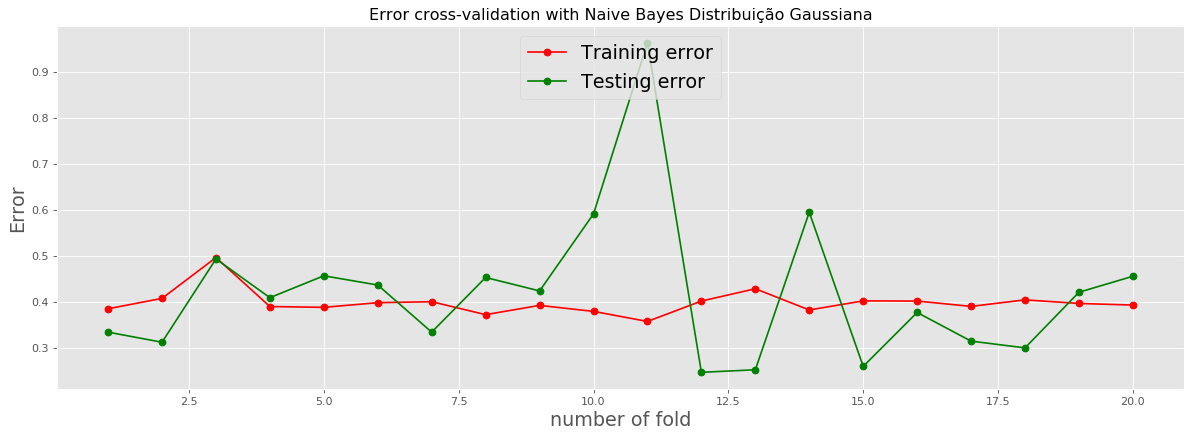

In [48]:
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('Error cross-validation with Naive Bayes Distribuição Gaussiana')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show() 

In [49]:
for a in range(0,20) :
    print("{0:.3f}  {1:.3f}".format( list_training_error[a], list_testing_error[a]))

0.385  0.335
0.408  0.313
0.497  0.494
0.390  0.410
0.388  0.457
0.399  0.437
0.401  0.335
0.373  0.453
0.393  0.424
0.380  0.592
0.358  0.963
0.402  0.247
0.429  0.253
0.383  0.595
0.402  0.260
0.402  0.377
0.391  0.315
0.405  0.300
0.397  0.421
0.393  0.456


# Usando Naive Bayes Distribuição de Bernoulli

In [49]:
import time

ini = time.time()

from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
gnb.fit(X_train, Y_train.transpose().to_numpy()[0] )
Y_previsto_NB_B = gnb.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_NB_B)
p_ac

0.8241619228336496

In [50]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 0.16190743446350098


# Overfitting x Underfitting

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()
gnb = gnb.fit(X_train, Y_train.transpose().to_numpy()[0] )

# Aplicando o modelo treinado
Y_train_data_pred = gnb.predict(X_train)
Y_test_data_pred = gnb.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.23788885678512953
Testing Error: 0.3663003663003663


# Usando KFolds cross-validation para avaliar a capacidade de generalização com Naive Bayes Distribuição de Bernoulli

In [44]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.naive_bayes import BernoulliNB

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    gnb = BernoulliNB()
    gnb = gnb.fit(X_train, Y_train.transpose().to_numpy()[0] )
    
    Y_train_data_pred = gnb.predict(X_train)
    Y_test_data_pred = gnb.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

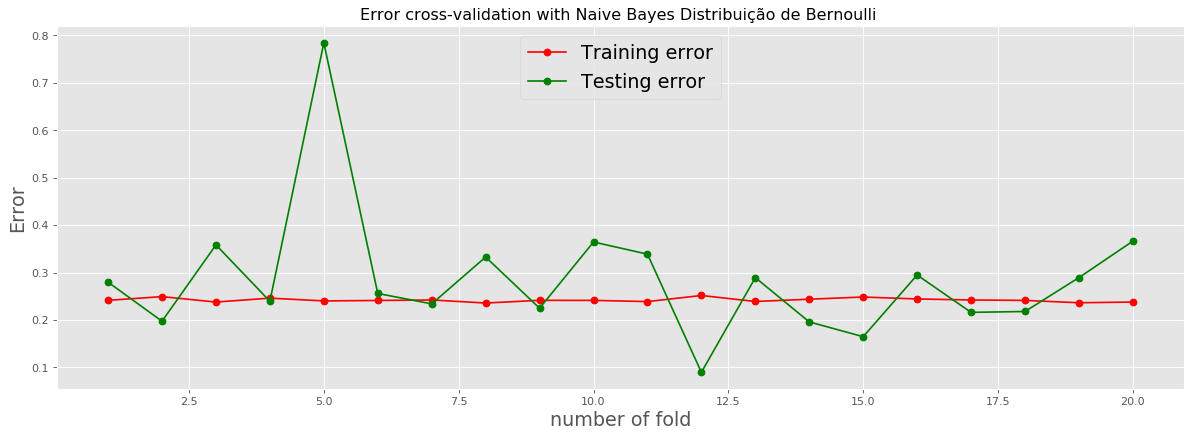

In [45]:
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('Error cross-validation with Naive Bayes Distribuição de Bernoulli ')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show() 

In [46]:
for a in range(0,20) :
    print("{0:.3f}  {1:.3f}".format( list_training_error[a], list_testing_error[a]))

0.241  0.280
0.249  0.197
0.238  0.358
0.246  0.239
0.240  0.784
0.241  0.256
0.242  0.234
0.236  0.333
0.241  0.225
0.241  0.364
0.239  0.339
0.252  0.090
0.239  0.289
0.244  0.196
0.248  0.165
0.244  0.295
0.242  0.216
0.241  0.218
0.236  0.289
0.238  0.366


# Usando RandomForestClassifier

In [13]:
import time

ini = time.time()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(X_train, Y_train.transpose().to_numpy()[0])
Y_previsto_RF = rf.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, np.floor( Y_previsto_RF))
p_ac


0.9048070841239721

In [14]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 6.523246765136719


In [12]:
p_ac = metrics.accuracy_score(Y_test, np.ceil( Y_previsto_RF))
p_ac

0.9048070841239721

# Overfitting x Underfitting

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf = rf.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = rf.predict(X_train)
Y_test_data_pred = rf.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.0
Testing Error: 0.08058608058608059


# Usando KFolds cross-validation para avaliar a capacidade de generalização com RandomForestClassifier

In [41]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    rf = RandomForestClassifier(n_estimators=50, random_state=1)
    rf = rf.fit(X_train, Y_train.transpose().to_numpy()[0])
    
    Y_train_data_pred = rf.predict(X_train)
    Y_test_data_pred = rf.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

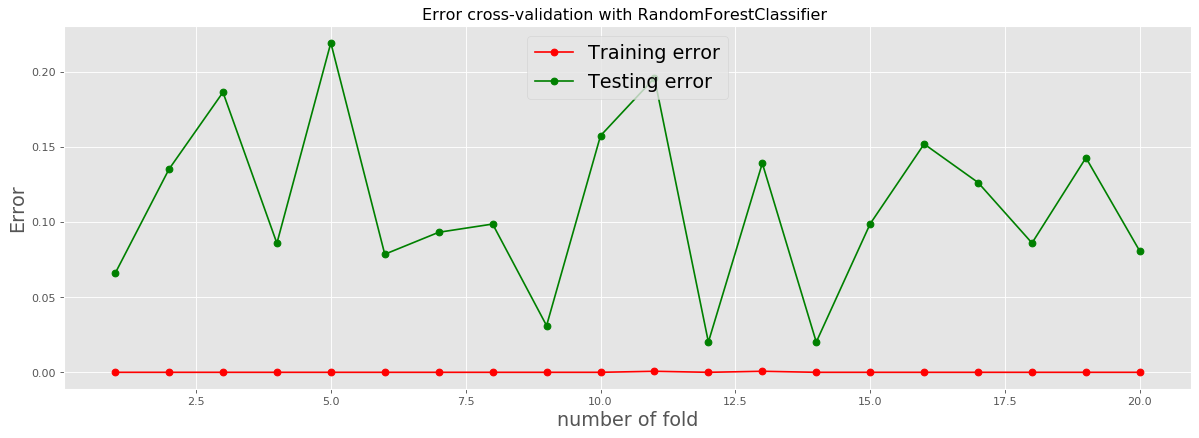

In [42]:
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('Error cross-validation with RandomForestClassifier ')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show() 

In [43]:
for a in range(0,20) :
    print("{0:.3f}  {1:.3f}".format( list_training_error[a], list_testing_error[a]))

0.000  0.066
0.000  0.135
0.000  0.186
0.000  0.086
0.000  0.219
0.000  0.079
0.000  0.093
0.000  0.099
0.000  0.031
0.000  0.158
0.001  0.196
0.000  0.020
0.001  0.139
0.000  0.020
0.000  0.099
0.000  0.152
0.000  0.126
0.000  0.086
0.000  0.143
0.000  0.081


# Usando Extremely Randomized Trees ExtraTreesClassifier (ERT)

In [26]:
import time

ini = time.time()

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train.transpose().to_numpy()[0])
#ExtraTreesClassifier(random_state=0)
Y_previsto_ERT = clf.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, np.floor( Y_previsto_ERT))
p_ac

0.9228336495888678

In [27]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 2.9854140281677246


In [28]:
p_ac = metrics.accuracy_score(Y_test, np.ceil( Y_previsto_ERT))
p_ac

0.9228336495888678

# Overfitting x Underfitting

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf = clf.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = clf.predict(X_train)
Y_test_data_pred = clf.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.0
Testing Error: 0.12492093611638204


# Usando KFolds cross-validation para avaliar a capacidade de generalização com Extremely Randomized Trees ExtraTreesClassifier (ERT)

In [38]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

path_X_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/X_train.txt'
X_train = pd.read_csv(path_X_train, sep=' ', header=None)
#len(X_train)

path_Y_train = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Train/y_train.txt'
Y_train = pd.read_csv(path_Y_train, sep=' ', header=None)
#len(Y_train)

path_X_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/X_test.txt'
X_test = pd.read_csv(path_X_test, sep=' ', header=None)

path_Y_test = '/Users/Venicius/Desktop/AM2020 trabalho final/HAPT Data Set/Test/y_test.txt'
Y_test = pd.read_csv(path_Y_test, sep=' ', header=None)

#print(len(Y_train), len(X_train), len(X_test), len(Y_test))

X = pd.concat( [X_train, X_test])
Y = pd.concat( [Y_train, Y_test])




kf = KFold(n_splits=20)

list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[ train_index], X.iloc[ test_index]
    Y_train, Y_test = Y.iloc[ train_index], Y.iloc[ test_index]

    clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
    clf = clf.fit(X_train, Y_train.transpose().to_numpy()[0])
    
    Y_train_data_pred = clf.predict(X_train)
    Y_test_data_pred = clf.predict(X_test)
    
    
    fold_training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
    fold_testing_error = mean_absolute_error(Y_test, Y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error) 

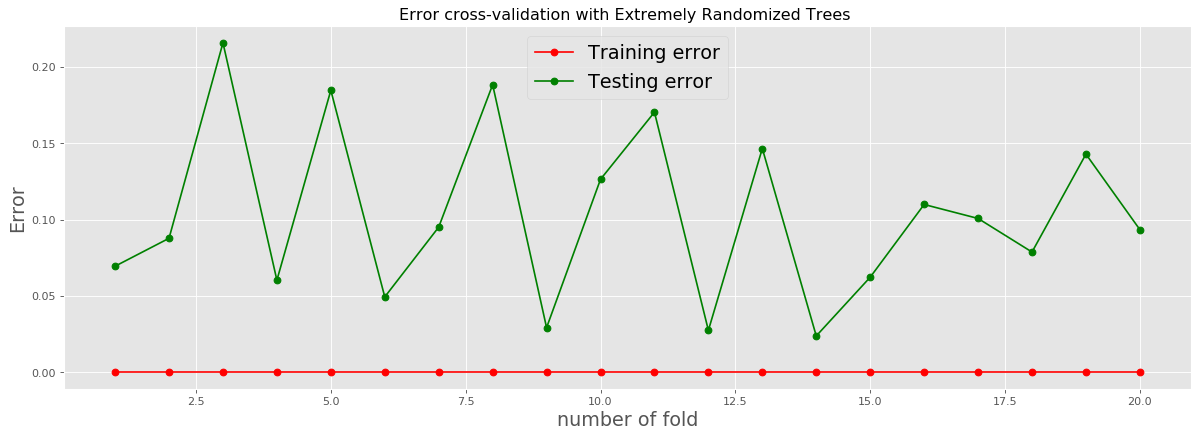

In [39]:
figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label='Training error', color='red')
plt.xlabel('number of fold')
#plt.ylabel('training error')
plt.title('Training error across folds')
#plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label='Testing error', color='green')
plt.xlabel('number of fold', fontsize='xx-large')
plt.ylabel('Error',fontsize='xx-large' )
plt.title('Error cross-validation with Extremely Randomized Trees ')
#plt.tight_layout()
plt.legend(['Training error', 'Testing error'], loc=9, fontsize='xx-large')
plt.show() 

In [40]:
for a in range(0,20) :
    print("{0:.3f}  {1:.3f}".format( list_training_error[a], list_testing_error[a]))

0.000  0.069
0.000  0.088
0.000  0.216
0.000  0.060
0.000  0.185
0.000  0.049
0.000  0.095
0.000  0.188
0.000  0.029
0.000  0.126
0.000  0.170
0.000  0.027
0.000  0.147
0.000  0.024
0.000  0.062
0.000  0.110
0.000  0.101
0.000  0.079
0.000  0.143
0.000  0.093


# Usando  Logistic Regression (LR)

In [32]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

import time

ini = time.time()


lr = LogisticRegression(random_state=0).fit(X_train, Y_train.transpose().to_numpy()[0])
Y_previsto_LR = lr.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, np.floor( Y_previsto_LR))
p_ac

0.9452877925363694

In [33]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 11.566370964050293


In [34]:
p_ac = metrics.accuracy_score(Y_test, np.ceil( Y_previsto_LR))
p_ac

0.9452877925363694

# Overfitting x Underfitting

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(random_state=0).fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = lr.predict(X_train)
Y_test_data_pred = lr.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.014162482296897129
Testing Error: 0.0961416824794434


# Usando Support Vector Machine (SVM) classifier (SVC)

In [47]:
import time

import warnings
warnings.filterwarnings('ignore')

ini = time.time()

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train.transpose().to_numpy()[0])
Y_previsto_SVM = clf.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, np.floor( Y_previsto_SVM))
p_ac

0.91808981657179

In [48]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 16.64618182182312


In [49]:
p_ac = metrics.accuracy_score(Y_test, np.ceil( Y_previsto_SVM))
p_ac

0.91808981657179

# Overfitting x Underfitting

In [36]:
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
clf = svm.SVC()
clf = clf.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = clf.predict(X_train)
Y_test_data_pred = clf.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.09063988670014163
Testing Error: 0.14168247944339027



# Suport Vector Classifier rbf e probability true

In [50]:
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

import time

ini = time.time()

# Classificadores
clf = SVC(kernel='rbf', probability=True)

clf.fit(X_train, Y_train.transpose().to_numpy()[0])

Y_previsto_svc = clf.predict(X_test)

# Análise da previsão
p_ac = metrics.accuracy_score(Y_test, Y_previsto_svc)
p_ac

0.91808981657179

In [51]:
fim = time.time()
print( "Tempo de execução: " + str(fim-ini))

Tempo de execução: 64.2437903881073


# Overfitting x Underfitting

In [37]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Classificadores
clf = SVC(kernel='rbf', probability=True)

clf = clf.fit(X_train, Y_train.transpose().to_numpy()[0])

# Aplicando o modelo treinado
Y_train_data_pred = clf.predict(X_train)
Y_test_data_pred = clf.predict(X_test)
    
training_error = mean_absolute_error(Y_train, Y_train_data_pred) 
testing_error = mean_absolute_error(Y_test, Y_test_data_pred)

print("Training Error: " + str(training_error))
print("Testing Error: " + str(testing_error))

Training Error: 0.09063988670014163
Testing Error: 0.14168247944339027
